# Partial Derivative Needed for the MSPAC Procedure

> Joseph P. Vantassel, The University of Texas at Austin


In [1]:
import numpy as np
from scipy.special import jv, j1
import matplotlib.pyplot as plt

## Equations
---

In [2]:
def eq15(fs, pm, dmin=10, dmax=11):
    """Eq. 15 from Bettig et al. (2001)."""
    ws = 2*np.pi*fs
    a = dmax*jv(1, ws*dmax/pm)
    b = dmin*jv(1, ws*dmin/pm)
    return 2*pm/(dmax*dmax - dmin*dmin)/ws * (a - b)

In [3]:
def eq15_alt(fs, pm, dmin=10, dmax=11):
    ws = 2*np.pi*fs
    ratios = 2*pm
    ratios /= (ws*(dmax*dmax - dmin*dmin))
    ratios *= (dmax*j1(ws*dmax/pm) -
               dmin*j1(ws*dmin/pm))
    return ratios

In [4]:
def eq21_aswritten(fs, pm, dmin=10, dmax=11):
    """Eq. 21 from Bettig et al. (2001) partial derviatve matrix of Eq. 15."""
    pm = pm.flatten()
    ws = 2*np.pi*fs
    dgdp = np.empty((len(fs), len(pm)))
    pm2 = pm*pm
    dmax3 = dmax**3
    dmin3 = dmin**3
    for row, w in enumerate(ws):
        a = w*dmax3/pm2 * jv(2, w*dmax/pm)
        b = w*dmin3/pm2 * jv(2, w*dmin/pm)
        dgdp[row] = a - b
    return dgdp

In [7]:
def eq21_correct(fs, pm, dmin=10, dmax=11):
    """Corrected partial derviatve matrix of Eq. 15."""
    ws = 2*np.pi*fs
    dgdp = np.empty((len(fs), len(pm)))
    dmax2 = dmax*dmax
    dmin2 = dmin*dmin
    for row, w in enumerate(ws):
        a = dmax2 * jv(2, w*dmax/pm)
        b = dmin2 * jv(2, w*dmin/pm)
        dgdp[row] = (2/(pm*(dmax2 - dmin2))) * (a - b)
    return dgdp

## Comparison
---

### Function

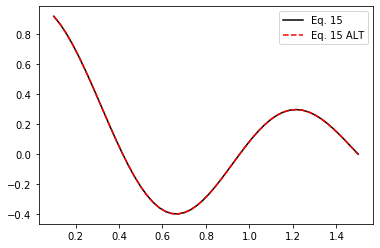

In [8]:
fs = np.linspace(0.1, 1.5, 50)
rh = eq15(fs, 400, dmin=352, dmax=383)
plt.plot(fs, rh, color="k", label="Eq. 15")

rh_alt = eq15_alt(fs, 400, dmin=352, dmax=383)
plt.plot(fs, rh_alt, color="r", linestyle="--", label="Eq. 15 ALT")

plt.legend(loc="upper right")
plt.show()

# for f, p in zip(fs, rh):
#     print(f, p)

### Derivative

In [47]:
fs = np.array([9.3214])
pm = np.array([125])
dx = 0.001
dmin, dmax = 20, 22

# Analytical - As Written
dgdp_aw = eq21_aswritten(fs, pm, dmin=dmin, dmax=dmax)

# Analytical - Corrected
dgdp_ac = eq21_correct(fs, pm, dmin=dmin, dmax=dmax)

# Numerical
dgdp_n = (eq15(fs, pm+dx, dmin=dmin, dmax=dmax) - eq15(fs, pm-dx, dmin=dmin, dmax=dmax)) / (2*dx)

print(f"dgdp - analytical\n {dgdp_aw}")
print(f"dgdp - analytical\n {dgdp_ac}")
print(f"dgdp - numerical\n  {dgdp_n}")

# print(f"dgdp - analytical - {dgdp_aw[0][0]:.3f}")
# print(f"dgdp - analytical - {dgdp_ac[0][0]:.3f}")
# print(f"dgdp - numerical  - {dgdp_n[0]:.3f}")

dgdp - analytical
 [[3.28071268]]
dgdp - analytical
 [[0.00611379]]
dgdp - numerical
  [0.00611379]
